In [3]:
pip install pandas scikit-learn matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# UHI Clustering: ColdChainIQ – Task 4
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# 1. Load ward-wise LST data
df = pd.read_csv("../BBMP_Avg_LST_April2023.csv")
print(df.head())

           system:index                assembly_1                assembly_2  \
0  00000000000000000006  154-RAJARAJESHWARI NAGAR  154-RAJARAJESHWARI NAGAR   
1  00000000000000000014  154-RAJARAJESHWARI NAGAR  154-RAJARAJESHWARI NAGAR   
2  00000000000000000016  154-RAJARAJESHWARI NAGAR  154-RAJARAJESHWARI NAGAR   
3  0000000000000000001a  154-RAJARAJESHWARI NAGAR  154-RAJARAJESHWARI NAGAR   
4  0000000000000000001b  154-RAJARAJESHWARI NAGAR  154-RAJARAJESHWARI NAGAR   

   assembly_c                                   bbox  female_pop  fill_opaci  \
0         154  773080,1.44017e+06,777392,1.44357e+06       17298           0   
1         154  775800,1.44154e+06,777753,1.44341e+06       19124           0   
2         154   773539,1.44211e+06,777308,1.4448e+06       17674           0   
3         154  776217,1.44117e+06,777490,1.44292e+06       20272           0   
4         154  772144,1.43515e+06,774038,1.43888e+06       15413           0   

   id  male_popul       mean  ... parliament

In [8]:
# 2. Clean and inspect
df = df.rename(columns={"mean": "Average_LST_Celsius"})
df_clean = df.dropna(subset=["Average_LST_Celsius"])  # drop rows without temperature

In [9]:
# 3. Extract values for clustering
X = df_clean[["Average_LST_Celsius"]].values

In [10]:
# 4. Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean["UHI_Cluster"] = kmeans.fit_predict(X)


In [11]:
# 5. Optional: Rename clusters for meaning
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_order = sorted([(val, idx) for idx, val in enumerate(cluster_centers)])

In [12]:
# Map 0 = cool, 1 = medium, 2 = hot
mapping = {original: new for new, (_, original) in enumerate(cluster_order)}
df_clean["UHI_Cluster_Label"] = df_clean["UHI_Cluster"].map(mapping)

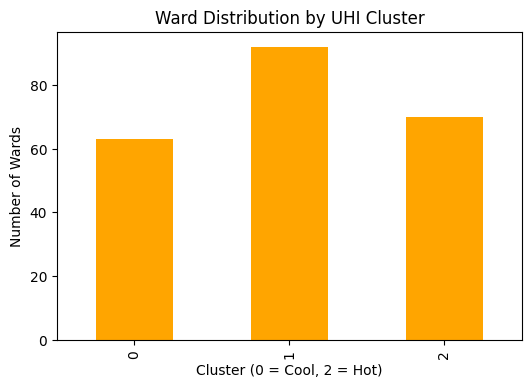

In [13]:
# 6. Plot cluster histogram
plt.figure(figsize=(6,4))
df_clean["UHI_Cluster_Label"].value_counts().sort_index().plot(kind="bar", color="orange")
plt.title("Ward Distribution by UHI Cluster")
plt.xlabel("Cluster (0 = Cool, 2 = Hot)")
plt.ylabel("Number of Wards")
plt.show()

In [14]:
# 7. Export to CSV
df_clean.to_csv("BBMP_UHI_clusters.csv", index=False)
print("✅ Exported: BBMP_UHI_clusters.csv")

✅ Exported: BBMP_UHI_clusters.csv


In [1]:
import geopandas as gpd

# Load the KML file
wards_kml = gpd.read_file('../data/bbmp_final_new_wards.kml', driver='KML')

# Save as GeoJSON for easier processing
wards_kml.to_file('../data/bbmp_wards.geojson', driver='GeoJSON')
print("✅ Converted KML to GeoJSON")


✅ Converted KML to GeoJSON


In [140]:
import geopandas as gpd
import pandas as pd

# Load the GeoJSON and CSV files
wards_gdf = gpd.read_file("../data/bbmp_wards.geojson")
uhi_df = pd.read_csv("../data/BBMP_UHI_clusters.csv")

In [142]:
print(uhi_df.columns.tolist())

['system:index', 'assembly_1', 'assembly_2', 'assembly_c', 'bbox', 'female_pop', 'fill_opaci', 'id', 'male_popul', 'Average_LST_Celsius', 'name_en', 'name_ka', 'parliame_1', 'parliame_2', 'parliament', 'population', 'proposed_1', 'proposed_w', 'sc_populat', 'st_populat', 'stroke', 'stroke_opa', 'ward_area', '.geo', 'UHI_Cluster', 'UHI_Cluster_Label']


In [152]:
import geopandas as gpd

wards_gdf = gpd.read_file("../data/bbmp_final_new_wards.shp")
wards_gdf.head()

,fill_opaci,stroke_opa,stroke,id,proposed_w,proposed_1,ward_area,name_en,name_ka,population,...,male_popul,female_pop,assembly_c,assembly_1,assembly_2,parliament,parliame_1,parliame_2,bbox,geometry
0,0,1,#ff0000,3,3-Atturu,3-à² à²¤à³à²¤à³à²°à³,8.269250,Atturu,à² à²¤à³à²¤à³à²°à³,42569,...,22772,19797,150,150-YELAHANKA,150-YELAHANKA,27,CHIKBALLAPUR,à²à²¿à²à³à²à²¬à²³à³à²³à²¾à²ªà³à²°,"775505,1.44756e+06,779824,1.45304e+06","POLYGON ((77.56114 13.08734, 77.56307 13.08619..."
1,0,1,#ff0000,17,17-Chikkasandra,17-à²à²¿à²à³à²à²¸à²à²¦à³à²°,3.958848,Chikkasandra,à²à²¿à²à³à²à²¸à²à²¦à³à²°,37486,...,19694,17792,155,155-DASARAHALLI,155-DASARAHALLI,24,BANGALORE NORTH,à²¬à³à²à²à²³à³à²°à³ à²à²¤à³à²¤à²°,"770249,1.44471e+06,773304,1.44691e+06","POLYGON ((77.49201 13.06003, 77.49231 13.06086..."
2,0,1,#ff0000,15,15-Kammagondanahalli,15-à²à²®à³à²®à²à³à²à²¡à²¨à²¹à²³à³à²³à²¿,5.719599,Kammagondanahalli,à²à²®à³à²®à²à³à²à²¡à²¨à²¹à²³à³à²³à²¿,42954,...,22445,20509,155,155-DASARAHALLI,155-DASARAHALLI,24,BANGALORE NORTH,à²¬à³à²à²à²³à³à²°à³ à²à²¤à³à²¤à²°,"771599,1.44457e+06,775501,1.44879e+06","POLYGON ((77.51581 13.06758, 77.51581 13.06758..."
3,0,1,#ff0000,16,16-Mallasandra,16-à²®à²²à³à²²à²¸à²à²¦à³à²°,3.438226,Mallasandra,à²®à²²à³à²²à²¸à²à²¦à³à²°,42930,...,22818,20112,155,155-DASARAHALLI,155-DASARAHALLI,24,BANGALORE NORTH,à²¬à³à²à²à²³à³à²°à³ à²à²¤à³à²¤à²°,"771974,1.44357e+06,774697,1.44596e+06","POLYGON ((77.51313 13.04807, 77.51291 13.04816..."
4,0,1,#ff0000,18,18-Bagalakunte,18-à²¬à²¾à²à²²à²à³à²à²à³,1.764574,Bagalakunte,à²¬à²¾à²à²²à²à³à²à²à³,42171,...,22101,20070,155,155-DASARAHALLI,155-DASARAHALLI,24,BANGALORE NORTH,à²¬à³à²à²à²³à³à²°à³ à²à²¤à³à²¤à²°,"770143,1.44371e+06,772468,1.4451e+06","POLYGON ((77.49439 13.05124, 77.49393 13.05136..."


In [153]:
print(wards_gdf.columns.tolist())
wards_gdf.iloc[0]

['fill_opaci', 'stroke_opa', 'stroke', 'id', 'proposed_w', 'proposed_1', 'ward_area', 'name_en', 'name_ka', 'population', 'sc_populat', 'st_populat', 'male_popul', 'female_pop', 'assembly_c', 'assembly_1', 'assembly_2', 'parliament', 'parliame_1', 'parliame_2', 'bbox', 'geometry']


fill_opaci                                                    0
stroke_opa                                                    1
stroke                                                  #ff0000
id                                                            3
proposed_w                                             3-Atturu
proposed_1                              3-à²
à²¤à³à²¤à³à²°à³
ward_area                                               8.26925
name_en                                                  Atturu
name_ka                                   à²
à²¤à³à²¤à³à²°à³
population                                                42569
sc_populat                                                 4878
st_populat                                                 1404
male_popul                                                22772
female_pop                                                19797
assembly_c                                                  150
assembly_1                              

In [155]:
print(merged_gdf.columns.tolist())

['fill_opaci_x', 'stroke_opa_x', 'stroke_x', 'id_x', 'proposed_w_x', 'proposed_1_x', 'ward_area_x', 'name_en_x', 'name_ka_x', 'population_x', 'sc_populat_x', 'st_populat_x', 'male_popul_x', 'female_pop_x', 'assembly_c_x', 'assembly_1_x', 'assembly_2_x', 'parliament_x', 'parliame_1_x', 'parliame_2_x', 'bbox_x', 'geometry', 'ward_name_clean', 'system:index', 'assembly_1_y', 'assembly_2_y', 'assembly_c_y', 'bbox_y', 'female_pop_y', 'fill_opaci_y', 'id_y', 'male_popul_y', 'Average_LST_Celsius', 'name_en_y', 'name_ka_y', 'parliame_1_y', 'parliame_2_y', 'parliament_y', 'population_y', 'proposed_1_y', 'proposed_w_y', 'sc_populat_y', 'st_populat_y', 'stroke_y', 'stroke_opa_y', 'ward_area_y', '.geo', 'UHI_Cluster', 'UHI_Cluster_Label']


In [156]:
import re

def normalize_name(name):
    if pd.isna(name) or name.strip() == "":
        return ""
    return re.sub(r'[^a-z0-9]', '', name.lower().strip())

# Normalize ward names in both GeoDataFrame and CSV
wards_gdf['ward_name_clean'] = wards_gdf['name_en'].apply(normalize_name)
uhi_df['ward_name_clean'] = uhi_df['name_en'].apply(normalize_name)

# Merge
merged_gdf = wards_gdf.merge(uhi_df, on='ward_name_clean', how='left')

# Check unmatched
unmatched = merged_gdf[merged_gdf['UHI_Cluster_Label'].isna()]
print(f"{len(unmatched)} unmatched wards")
display(unmatched[['ward_name_clean']])

0 unmatched wards


,ward_name_clean


<Axes: >

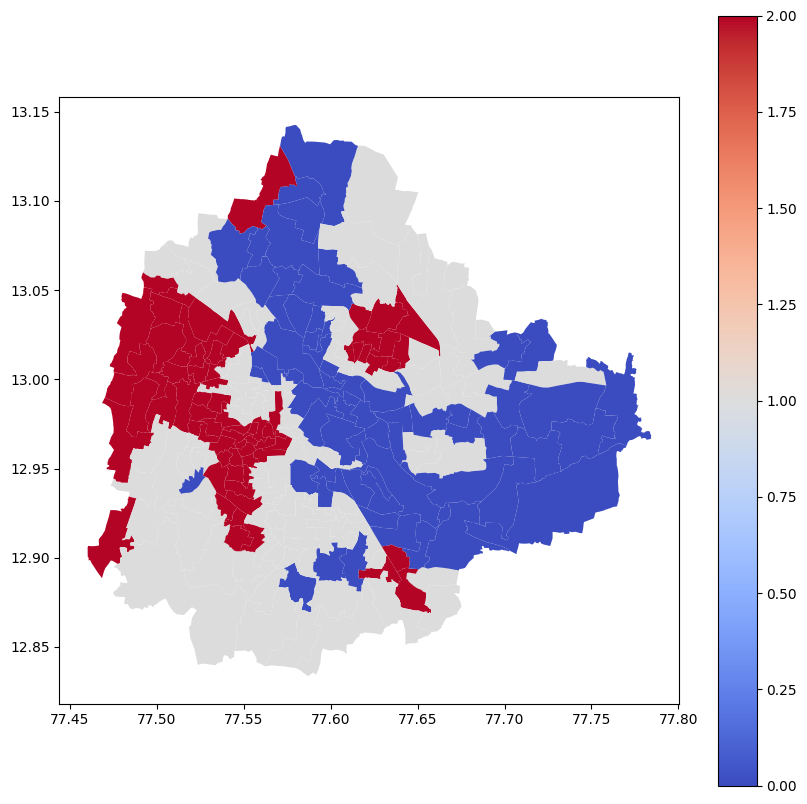

In [157]:
merged_gdf.plot(column="UHI_Cluster_Label", cmap="coolwarm", legend=True, figsize=(10, 10))

In [158]:
merged_gdf.to_file("../data/merged_uhi_wards.geojson", driver="GeoJSON")

In [159]:
merged_gdf.drop(columns='geometry').to_csv("../data/merged_uhi_table.csv", index=False)

In [161]:
import random
import json
from datetime import datetime, timedelta

# Use clean ward names from merged_gdf
wards = merged_gdf['name_en_x'].dropna().unique().tolist()
products = ["milk", "vaccine", "meat"]

simulated_routes = []

for i in range(5):  # 5 routes
    route_id = f"route_{i+1:03d}"
    product = random.choice(products)
    num_waypoints = random.randint(3, 5)
    waypoints = random.sample(wards, num_waypoints)

    # Start time between 6–9 AM
    start_time = datetime.strptime("2025-06-23 06:00:00", "%Y-%m-%d %H:%M:%S") + timedelta(minutes=random.randint(0, 180))
    route = {
        "route_id": route_id,
        "product": product,
        "start_time": start_time.isoformat(),
        "waypoints": []
    }

    current_time = start_time
    for ward in waypoints:
        route["waypoints"].append({
            "ward": ward,
            "arrival_time": current_time.isoformat()
        })
        current_time += timedelta(minutes=random.randint(15, 30))  # Time between deliveries

    simulated_routes.append(route)

# Save as JSON
with open("../data/simulated_routes.json", "w") as f:
    json.dump(simulated_routes, f, indent=2)

print("✅ 5 simulated delivery routes saved to simulated_routes.json")


✅ 5 simulated delivery routes saved to simulated_routes.json


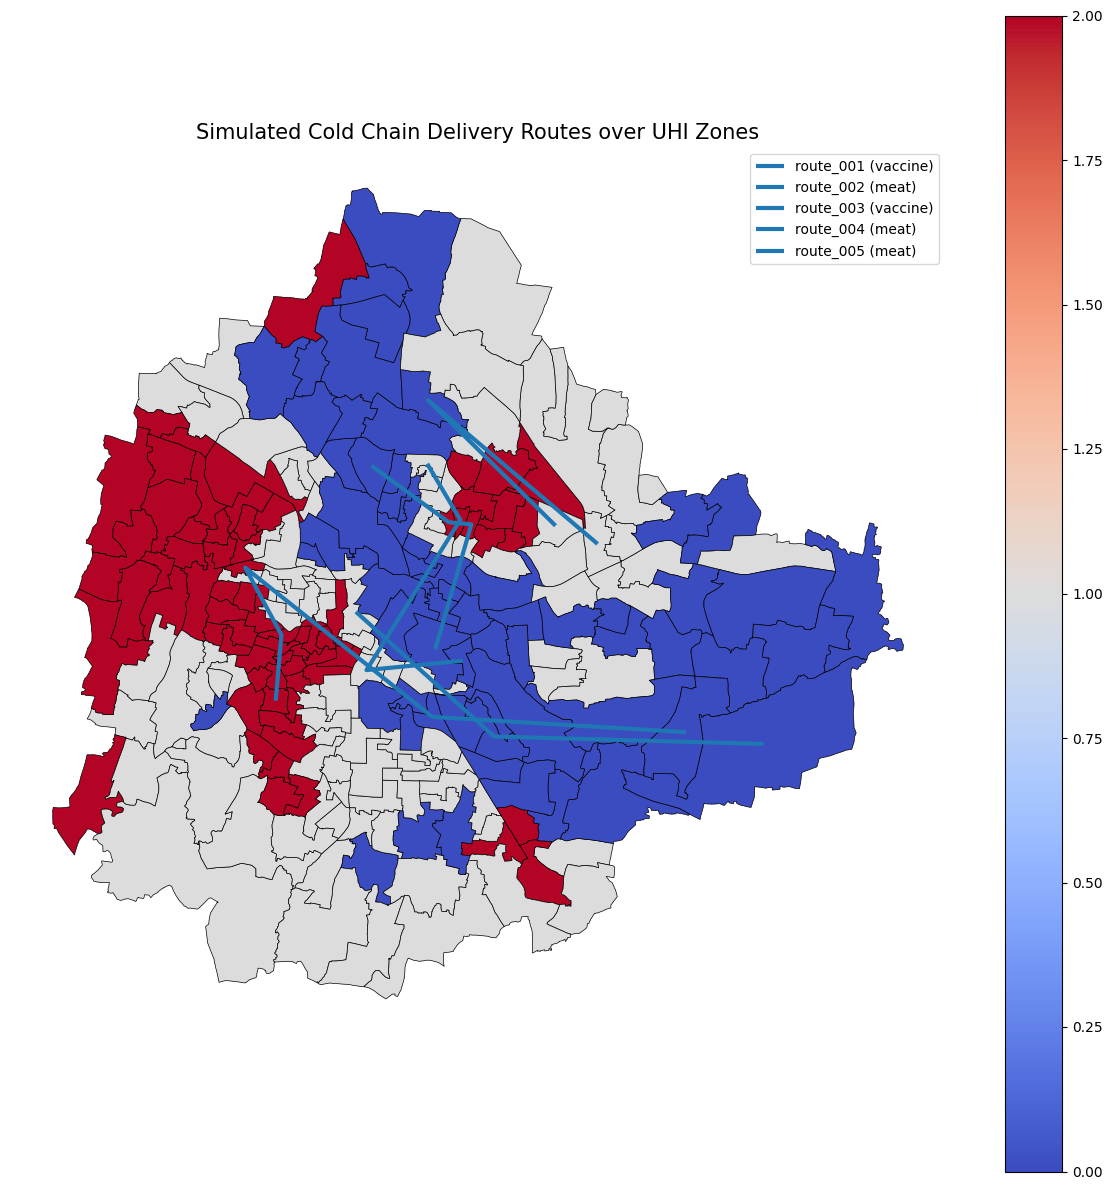

In [162]:
import json
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the routes
with open("../data/simulated_routes.json") as f:
    routes = json.load(f)

# Prepare a map base
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(column="UHI_Cluster_Label", cmap="coolwarm", linewidth=0.5, edgecolor="black", legend=True, ax=ax)

# Plot each route
for route in routes:
    waypoints = route['waypoints']
    product = route['product']
    coords = []

    for wp in waypoints:
        ward = wp['ward']
        # Get centroid of the ward
        row = merged_gdf[merged_gdf['name_en_x'] == ward]
        if not row.empty:
            point = row.geometry.values[0].centroid
            coords.append((point.x, point.y))

    # Only draw if we have 2+ valid points
    if len(coords) >= 2:
        line = LineString(coords)
        gpd.GeoSeries([line]).plot(ax=ax, linewidth=3, label=f"{route['route_id']} ({product})")

# Beautify
plt.title("Simulated Cold Chain Delivery Routes over UHI Zones", fontsize=15)
plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()
